<a href="https://colab.research.google.com/github/uss111kr/Compressive_Strength_of_Concrete/blob/main/Compressive_Strength_of_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Project

Perform exploratory data analysis on the [Compressive Strength of Concrete](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength) dataset.


1. Load the data (excel sheet) as a `pandas` data frame and view it in the notebook.
2. Rename columns (see the table in "About the Dataset" section).
3. Create a derived column - `water_cement_ratio` using `water` and `cement` ratio. The values are unitless.
4. Draw scatter plots for `water_cement_ratio` vs `compressive_strength` and `age` vs `compressive_strength`.
4. Plot histograms for `fly_ash`, `superplasticizer` and `blast_furnace_slag` colums.
5. Calculate the correlation matrix and identify highly correlated columns.


# About the Dataset

*This is an excerpt from the `Concrete_Readme.txt` file in the archive downloaded from the source URL of the dataset.*

Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory.

Data is in raw form (not scaled).

Given is the variable name, variable type, the measurement unit and a brief description. The order of this listing corresponds to the order of numerals along the rows of the database.

| Name | Column Name| Data Type | Measurement | Description |
| :--- | :--- | :--- | :--- | :--- |
| **Cement (component 1)** | cement | Quantitative | kg in a m³ mixture | Input Variable |
| **Blast Furnace Slag (component 2)** | blast_furnace_slag | Quantitative | kg in a m³ mixture | Input Variable |
| **Fly Ash (component 3)** | fly_ash | Quantitative | kg in a m³ mixture | Input Variable |
| **Water (component 4)** | water | Quantitative | kg in a m³ mixture | Input Variable |
| **Superplasticizer (component 5)** | superplasticizer | Quantitative | kg in a m³ mixture | Input Variable |
| **Coarse Aggregate (component 6)** | coarse_aggregate | Quantitative | kg in a m³ mixture | Input Variable |
| **Fine Aggregate (component 7)** | fine_aggregate | Quantitative | kg in a m³ mixture | Input Variable |
| **Age** | age | Quantitative | Day (1~365) | Input Variable |
| **Concrete compressive strength** | compressive_strength | Quantitative | MPa | Output Variable |

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/drive/MyDrive/Python/Concrete_Data.xls")
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#

In [ ]:
df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast_furnace_slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate',
    'Age (day)': 'age',
    'Concrete compressive strength(MPa, megapascals) ': 'compressive_strength'
}, inplace=True)
df.head(10)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['water_cement_ratio'] = df['water'] / df['cement']
df.head(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength,water_cement_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767


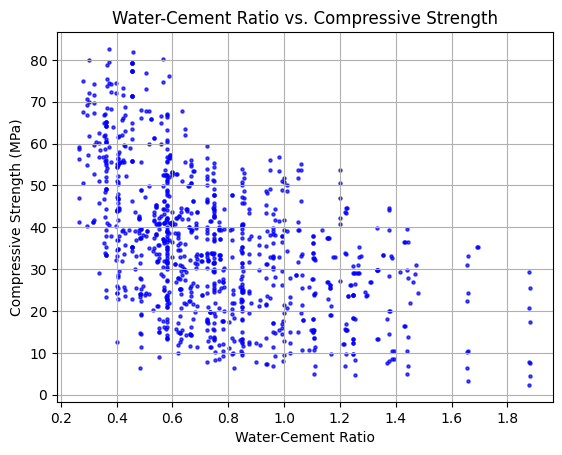

In [ ]:
#(SCATTER PLOT OF ABRAMS LAW)
import matplotlib.pyplot as plt
plt.scatter(
    df['water_cement_ratio'],
    df['compressive_strength'], # Corrected from 'compressive_strengths'
    color="blue",
    s=5,         #size
    alpha=0.7     #tranparency
)

plt.xlabel('Water-Cement Ratio')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Water-Cement Ratio vs. Compressive Strength')
plt.grid(True)
plt.show()

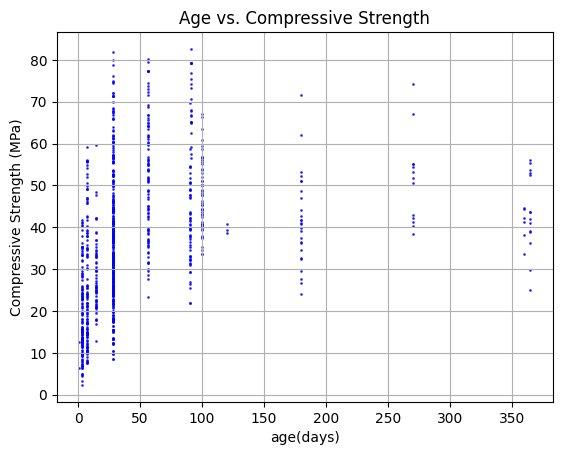

In [ ]:
#(SCATTER PLOT FOR STRENGTH GAIN)
plt.scatter(
    df['age'],
    df['compressive_strength'], # Corrected from 'compressive_strengths'
    color="blue",
    s=1,         #size
    alpha=0.7     #tranparency
)

plt.xlabel('age(days)')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Age vs. Compressive Strength')
plt.grid(True)
plt.show()

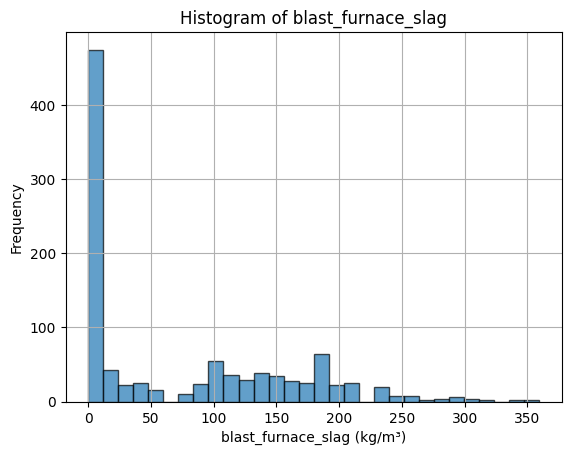

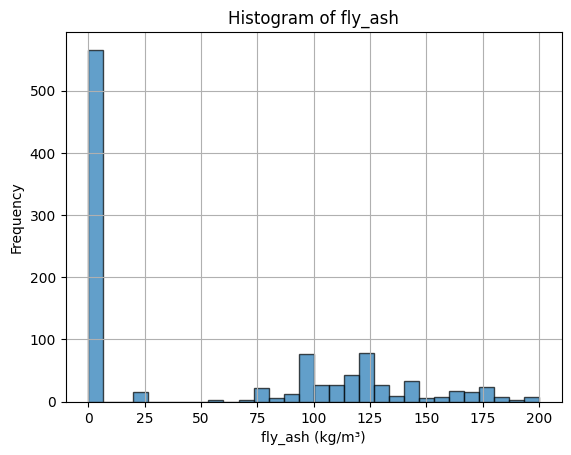

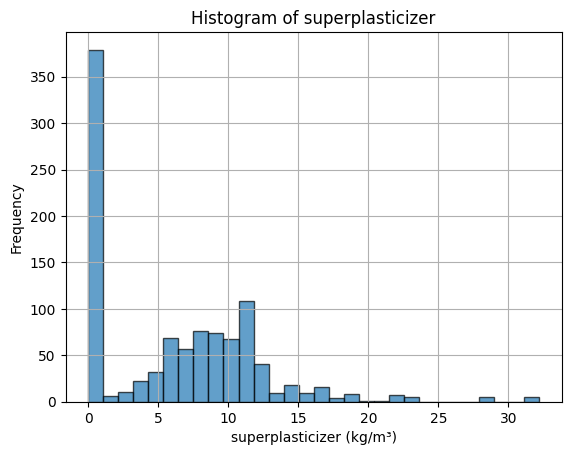

In [ ]:
# (HISTOGRAMS OF ADMIXTURES)
columns = ["blast_furnace_slag", "fly_ash", "superplasticizer"]

for col in columns:
    plt.figure()
    plt.hist(df[col], bins=30, edgecolor="black", alpha=0.7)
    plt.xlabel(f"{col} (kg/m³)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.grid(True)
    plt.show()



In [ ]:
df = df[df['age'] == 28]
spearman_corr=df.corr(method = 'spearman')
strength_corr = spearman_corr['compressive_strength']

display(strength_corr)

#The ingredient that has the highest positive and the least positive
# (or highest negative) impact on the compressive strength.
strength_corr_filtered = strength_corr.drop(['age', 'compressive_strength'])

# Identify the ingredient with the highest positive impact
highest_corr_ingredient = strength_corr_filtered.idxmax()
highest_corr_value = strength_corr_filtered.max()

# Identify the ingredient with the least positive (or highest negative) impact
least_positive_corr_ingredient = strength_corr_filtered.idxmin()
least_positive_corr_value = strength_corr_filtered.min()

display(f"Ingredient with highest positive impact: {highest_corr_ingredient} \
(Correlation: {highest_corr_value})")
display(f"Ingredient with least positive (or highest negative) impact: \
{least_positive_corr_ingredient} (Correlation: {least_positive_corr_value})")

#Positive or negative impact on 28 days strength on increasing concentration
# of each ingredients
display("Impact of each ingredient on 28-day compressive strength:")
for ingredient, correlation in strength_corr_filtered.items():
    impact = 'positive' if correlation > 0 else 'negative'
    display(f"- {ingredient}: {impact} impact (Correlation: {correlation:})")

,compressive_strength
cement,0.654656
blast_furnace_slag,0.170170
fly_ash,-0.232088
water,-0.366112
superplasticizer,0.207668
coarse_aggregate,-0.155105
fine_aggregate,-0.176878
age,NaN
compressive_strength,1.000000
water_cement_ratio,-0.697597


'Ingredient with highest positive impact: cement (Correlation: 0.6546555175376805)'

'Ingredient with least positive (or highest negative) impact: water_cement_ratio (Correlation: -0.6975974883510029)'

'Impact of each ingredient on 28-day compressive strength:'

'- cement: positive impact (Correlation: 0.6546555175376805)'

'- blast_furnace_slag: positive impact (Correlation: 0.170169575292535)'

'- fly_ash: negative impact (Correlation: -0.23208771122941466)'

'- water: negative impact (Correlation: -0.366111808950658)'

'- superplasticizer: positive impact (Correlation: 0.20766819173369272)'

'- coarse_aggregate: negative impact (Correlation: -0.15510513545870788)'

'- fine_aggregate: negative impact (Correlation: -0.17687772168531934)'

'- water_cement_ratio: negative impact (Correlation: -0.6975974883510029)'